In [2]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load the dataset
dataset = pd.read_csv("Social_Network_Ads.csv")

In [4]:
# extract independent and dependent variable
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
# split the dataset into train and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [7]:
# Fit the SVM classifier to the train set
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=0)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [8]:
# Predict the test set result
y_pred = svc.predict(x_test)

In [9]:
# create the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


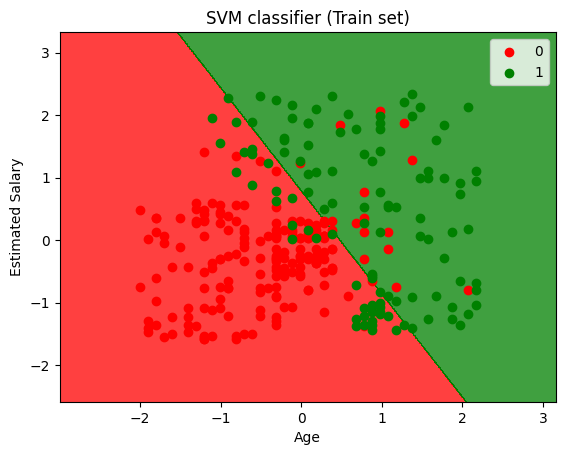

In [13]:
# visualize the train set result
from matplotlib.colors import ListedColormap

x1, x2 = np.meshgrid(np.arange(start = x_train[:, 0].min() - 1, stop = x_train[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_train[:, 1].min() - 1, stop = x_train[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, svc.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train == j, 0], x_train[y_train == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


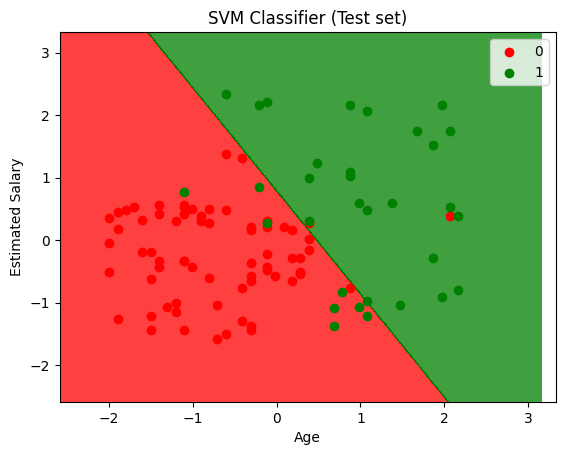

In [12]:
# Visualize the test result
from matplotlib.colors import ListedColormap

x1, x2 = np.meshgrid(np.arange(start = x_test[:, 0].min() - 1, stop = x_test[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_test[:, 1].min() - 1, stop = x_test[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, svc.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(x_test[y_test == j, 0], x_test[y_test == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()